# Analyze Titanic Data

# My Target Question

My target question - **Find factors that may influence survival rate in Titanic disaster.**

# Import Titanic Data

In [35]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
%matplotlib inline

# get titanic-data csv files as a DataFrame and display
titanic_df = pd.read_csv("titanic-data.csv")
print 'Original data:'
titanic_df.head()

Original data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop non-informative columns

My target to find factors that will influence people survive. Since intuitively, **Name**, **Ticket**, **PassengerId** are totally irrelevant to my goal, I will drop these columns.

In [36]:
# Drop three unreleveant feature - Name, Ticket and PassengerId and display
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Data formating and cleaning

* In order to change data types of titanic properly, I should first see its original data types.
* Test whether there are missing values in each column.
* I changed data type of **Survived** from int to boolean because this is more intuitive.
* I will not try to fill in any missing values of **Age**, instead when using this feature, I just drop any data rows whose **Age** value is missing.
* For **Cabin**, since too much percentage of NaN exists, it is not informative enough. So I simply drop it.
* For **Embarked**, because very few of them is NaN. So I drop data rows with unvalid **Embarked** value.

In [37]:
# return how many data rows with unvalid value for specified column name.    
def num_not_valid(name):
    test = titanic_df[name] >= 0
    return len(titanic_df[test == False])

**Note:** For each feature, I add up all valid number of data rows with valid feature data. If this number equals to the total number of data rows, all data rows are valid for this feature. Otherwise, I will print out number of (nonzero) data rows whose feature values are not valid and do more investigation on this feature.

In [38]:
# Get basic info including data types of titanic_first DataFrame
print 'Basic information of titanic data frame: '
titanic_df.info()
print '---------------------------------------------------------------------------------------------------------------'

# Test whether all 'Survived' data are valid
is_valid_survived = len(titanic_df[titanic_df['Survived'] == 0]) + len(titanic_df[titanic_df['Survived'] == 1]) == len(titanic_df)
print 'Survived column consists of only 1 and 0, as a result, it is valid!'
# Change data format of feature 'Survived' from int to bool
titanic_df['Survived'] = titanic_df['Survived'].astype('bool')

# Test whether all 'Pclass' data are valid
isValid_Pclass = len(titanic_df[titanic_df['Pclass'] == 1]) + len(titanic_df[titanic_df['Pclass'] == 2]) + len(titanic_df[titanic_df['Pclass'] == 3]) == len(titanic_df)
print 'Result is %r. Pclass column consists of only valid 1, 2, 3 values according to Kaggle document.' % (isValid_Pclass)

# Test 'Sex' feature and change its type from string to bool
print len(titanic_df[titanic_df['Sex'] == 'male']) + len(titanic_df[titanic_df['Sex'] == 'female']) == len(titanic_df)
print 'Sex consists of only male and female values.'
# titanic_df['Sex'] = titanic_df['Sex'] == 'male'

# Test 'Age' feature
num_not_valid_age = num_not_valid('Age')
print 'Age contains {0:2d} NaN!'.format(num_not_valid_age)
print 'I will not deal with NaN value of age, instead, I will drop unvalid data rows when analyze age related features.'

# Test 'SibSp' feature
is_valid_SibSp = num_not_valid('SibSp') == 0
print 'Result is %r. All data in SibSp are valid.' % (is_valid_SibSp)
# Test 'Parch' feature
is_valid_Parch = num_not_valid('Parch') == 0
print 'Result is %r. All data in Parch are valid.' % (is_valid_Parch)
# Test 'Fare' feature
is_valid_Fare = num_not_valid('Fare') == 0
print 'Result is %r. All data in Fare are valid.' % (is_valid_Fare)

# Test 'Cabin' feature
invalid_rate_Cabin = titanic_df['Cabin'].isnull().sum() * 1.0 / len(titanic_df)
titanic_df = titanic_df.drop(['Cabin'], axis = 1)
print 'Percentage of NaN ({0:f}) is too high for data of Cabin, so I simple drop this feature.'.format(invalid_rate_Cabin)

# Test Embarked feature
num_invalid_Embarked = len(titanic_df) - len(titanic_df[titanic_df['Embarked'] == 'C']) - len(titanic_df[titanic_df['Embarked'] == 'Q']) - len(titanic_df[titanic_df['Embarked'] == 'S'])
print 'Embarded contains {0:d} unvalid data besides C, Q and S according to Kaggle document.'.format(num_invalid_Embarked)
percentage_unvalid_Embarked = (len(titanic_df) - len(titanic_df[titanic_df['Embarked'] == 'C']) - len(titanic_df[titanic_df['Embarked'] == 'Q']) - len(titanic_df[titanic_df['Embarked'] == 'S'])) * 0.1 / len(titanic_df)
titanic_df = titanic_df[(titanic_df['Embarked'] == 'C')|(titanic_df['Embarked'] == 'Q')|(titanic_df['Embarked'] == 'S')]
print 'Percentage of unvalid Embarded data ({0:f}) is too low, as a result, I simply drop data rows with unvalid Embarded data.'.format(percentage_unvalid_Embarked)
print '---------------------------------------------------------------------------------------------------------------'

# Display current cleaned data
print 'The following is titanic data after current stage of data cleaning:'
titanic_df.head()

Basic information of titanic data frame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
---------------------------------------------------------------------------------------------------------------
Survived column consists of only 1 and 0, as a result, it is valid!
Result is True. Pclass column consists of only valid 1, 2, 3 values according to Kaggle document.
True
Sex consists of only male and female values.
Age contains 177 NaN!
I will not deal with NaN value of age, instead, I will drop unvalid data rows when analyze age related features.
Result is True. All data in SibSp are vali

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,3,male,22.0,1,0,7.2500,S
1,True,1,female,38.0,1,0,71.2833,C
2,True,3,female,26.0,0,0,7.9250,S
3,True,1,female,35.0,1,0,53.1000,S
4,False,3,male,35.0,0,0,8.0500,S


In the following blocks of code, I will use the following features - **Pclass**, **SibSp**, **Parch**, **Fare** to find their relationship with dependent variable - **Survived**.

# Investigate Pclass and Fare

I believe the higher the class of passengers, the more fare passengers will spent. Next I will investigate relationship between **Pclass** and **Fare**.

In [39]:
# Analyze of Pclass and Fare features
pclass_fare_data = titanic_df[['Pclass', 'Fare']]

# Calculate statistics for three kinds of Pclass
class_three = pclass_fare_data[pclass_fare_data['Pclass'] == 3]
class_two = pclass_fare_data[pclass_fare_data['Pclass'] == 2]
class_one = pclass_fare_data[pclass_fare_data['Pclass'] == 1]

print '---------------------------------------------------------------------------------------------------------------'
# Statistic info of Lowest Class
print 'Lowest Class:'
print class_three.describe()

---------------------------------------------------------------------------------------------------------------
Lowest Class:
       Pclass        Fare
count   491.0  491.000000
mean      3.0   13.675550
std       0.0   11.778142
min       3.0    0.000000
25%       3.0    7.750000
50%       3.0    8.050000
75%       3.0   15.500000
max       3.0   69.550000


In [40]:
# Statistic info of Middle Class
print 'Middle Class:'
print class_two.describe()

Middle Class:
       Pclass        Fare
count   184.0  184.000000
mean      2.0   20.662183
std       0.0   13.417399
min       2.0    0.000000
25%       2.0   13.000000
50%       2.0   14.250000
75%       2.0   26.000000
max       2.0   73.500000


In [41]:
# Statistic info of Highest Class
print 'Highest Class:'
print class_one.describe()

Highest Class:
       Pclass        Fare
count   214.0  214.000000
mean      1.0   84.193516
std       0.0   78.746457
min       1.0    0.000000
25%       1.0   30.771850
50%       1.0   58.689600
75%       1.0   93.500000
max       1.0  512.329200


It can be concluded that there are huge differeces of average and median fare value between three classes. And I also calculate correlation between **Pclass** and **Fare**:

In [42]:
# Defined for pearson correlation implemented in Udacity class 
def correlation(x, y):
    '''
    correlation = average of (x in standard units) times (y in standard units)
    '''
    x_std_unit = (x - x.mean()) / x.std(ddof=0)
    y_std_unit = (y - y.mean()) / y.std(ddof=0)
    return (x_std_unit * y_std_unit).mean()

The correlation between pclass and fare is -0.548193.


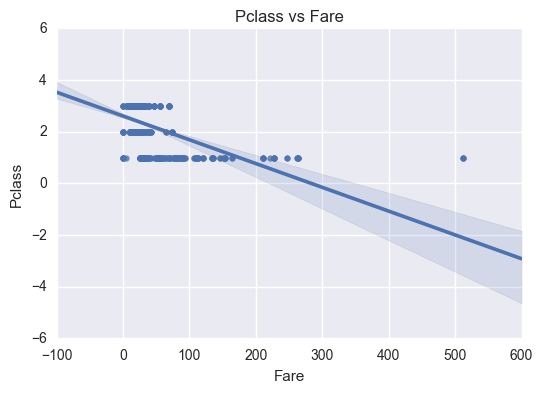

In [43]:
# Calculate correlation between pclass and fare and make graph for pclass_fare_data
corr_pclass_fare = correlation(pclass_fare_data['Pclass'], pclass_fare_data['Fare'])
print 'The correlation between pclass and fare is {0:f}.'.format(corr_pclass_fare)
sns.regplot(x = "Fare", y = "Pclass", data = pclass_fare_data)
ax = plt.axes()
ax.set_title('Pclass vs Fare')

## Summary:

From correlation value between **Pclass** and **Fare**, it can be concluded that: <br /> 
* The higher class (the lower number of class), the higher fare. 
* The regression plot offer me the same conclusion. 
* Since these two features are similar, I will only take **Pclass** into account and drop **Fare** feature.

In [44]:
# Drop Fare feature
titanic_df = titanic_df.drop(['Fare'], axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,False,3,male,22.0,1,0,S
1,True,1,female,38.0,1,0,C
2,True,3,female,26.0,0,0,S
3,True,1,female,35.0,1,0,S
4,False,3,male,35.0,0,0,S


# Compare Pclass and Survival Rate

Intuitively, I believe the higher class, the higher survival rate because passengers in higher pclass should have some kind of higher priority of be saved by saving boat. In next part, I will illustrate this.  

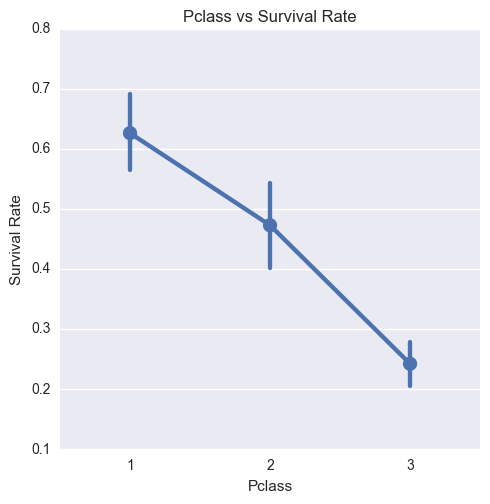

In [45]:
# Draw graphs on suvival rate vs Pclass.
ax = sns.factorplot('Pclass','Survived', order = [1,2,3], data = titanic_df, size = 5)
sns.plt.title('Pclass vs Survival Rate')
ax.set(xlabel='Pclass', ylabel='Survival Rate')

To dig deeper into relationship between **Pclass** and **Survived**, I will find correlation between pclass and its accordingly survival rate.

In [46]:
# Calculate correlation between pclass and survival rate
class1_surv = titanic_df[titanic_df['Pclass'] == 1]['Survived'].mean()
class2_surv = titanic_df[titanic_df['Pclass'] == 2]['Survived'].mean()
class3_surv = titanic_df[titanic_df['Pclass'] == 3]['Survived'].mean()
class_surv = np.array([class1_surv, class2_surv, class3_surv])
class_num = np.array([1, 2, 3])
corr_pclass_surv = correlation(class_surv, class_num)
print 'The correlation between pclass and survival rate is ' + format(corr_pclass_surv) + '.'

The correlation between pclass and survival rate is -0.993337779574.


Next I will use chi squared function to test independence between **Pclass** and **Survived**.

In [47]:
# Calculate both survived and unsurvived number in each three classes
num_class_one_survived = len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == True)])
num_class_two_survived = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == True)])
num_class_three_survived = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == True)])
num_class_one_unsurvived = len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == False)])
num_class_two_unsurvived = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == False)])
num_class_three_unsurvived = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == False)])

# Calculate Chi-squared
array = np.array([[num_class_one_survived, num_class_two_survived, num_class_three_survived], \
                [num_class_one_unsurvived, num_class_two_unsurvived, num_class_three_unsurvived]])
chi2, p, dof, ex = sp.chi2_contingency(array, correction=False)
print "p-value: ", p
print "Chi-squared score: ", chi2
print "Expected values: ", ex

p-value:  1.18136247855e-22
Chi-squared score:  100.980407261
Expected values:  [[  81.8447694   70.3712036  187.784027 ]
 [ 132.1552306  113.6287964  303.215973 ]]


Running the chi squared function from scipy below, we see that the p-value is far smaller than 0.05. Therefore, I reject the null hypothesis -- survival and pclass are not related. From previous correlation, it can be clearly concluded that there is a direct relationship between **Pclass** and **Survive**.

## Summary:

It is really interesting that Pclass will influence the survival rate. I believe this is due to the money gap spent by tickets between passengers in different pclass. For example, it may contains priority of being saved by saving boats when disaster happens. Or it may be related only to social status? <br />
In this part, I use three ways to confirm strong relationship between **Pclass** and **Survive**: <br />
* Factor plot graph 
* Correlation result
* Chi-squrared result

# Compare Age and Survival Rate

Next I will deal with relationship between **Age** and **Survival**.<br />
In the following graph, I calculate survival rate aggregated by each distinct valid age and draw bar graph according to those survival rates are higher than 50%.

[<matplotlib.text.Text at 0x119969a90>, <matplotlib.text.Text at 0x117d4ee10>]

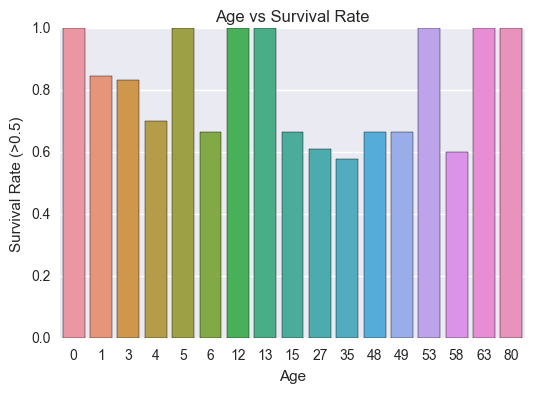

In [48]:
# Parse float to nearest integer, used to format age for a more clear x-axle value.
def parse_float_to_int(f):
    return int(round(f))
titanic_age_relate = titanic_df[titanic_df['Age'] >= 0]
titanic_age_relate.loc[:, 'Age'] = titanic_age_relate.loc[:, 'Age'].apply(parse_float_to_int)

# Draw bar graph 
average_age = titanic_age_relate[["Age", "Survived"]].groupby(['Age'], as_index = False).mean()
average_age = average_age[average_age['Survived'] > 0.5]
ax = sns.barplot(x = 'Age', y = 'Survived', data = average_age)
sns.plt.title('Age vs Survival Rate')
ax.set(xlabel='Age', ylabel='Survival Rate (>0.5)')

From Age vs survival rate graph, it can be concluded that passengers with higher age (>= 50) and those with lower age (<= 14) trend to have a higher survival rate as an age group. Next I will use correlation to show age groups' relationship with survival rate. 

In [49]:
# Calculate correlation between age and survival rate
young_surv = titanic_age_relate[titanic_age_relate['Age'] <= 14]['Survived'].mean()
middle_surv = titanic_age_relate[(titanic_age_relate['Age'] >= 15) & (titanic_age_relate['Age'] < 50)]['Survived'].mean()
old_surv = titanic_age_relate[titanic_age_relate['Age'] >= 50]['Survived'].mean()
age_surv = np.array([young_surv, middle_surv, old_surv])
age_level = np.array([7, 31, 65]) # Middle of each range of age.
corr_age_surv = correlation(age_surv, age_level)
print 'The correlation between pclass and survival rate is ' + format(corr_age_surv) + '.'

The correlation between pclass and survival rate is -0.876734219815.


In [50]:
# Calculate direct correlation between age and survived or not
average_all_age = titanic_age_relate[["Age", "Survived"]].groupby(['Age'], as_index = False).mean()
age = average_all_age['Age']
survived = average_all_age['Survived']
corr_age_surv = correlation(age, survived)
print 'The correlation between pclass and survival rate is ' + format(corr_age_surv) + '.'

The correlation between pclass and survival rate is -0.335020940255.


From previous two correlation calculation, it can be concluded that although three group of ages (young, middle and old) are closely correlated with survival rate, independent age is not that clearly correlated with survival rate. In order to explain it. I will explore extreme values of survival rates.

In [51]:
# Find age whose survival rate equals one
age_surv_rate_one = average_all_age[average_all_age['Survived'] == 1]['Age']
print 'Ages with one survival rate:'
print age_surv_rate_one
num_passengers_of_age = average_all_age[(average_all_age['Age'] == 0) | \
                                        (average_all_age['Age'] == 5) | \
                                        (average_all_age['Age'] == 12) | \
                                        (average_all_age['Age'] == 13) | \
                                        (average_all_age['Age'] == 53) | \
                                        (average_all_age['Age'] == 63) | \
                                        (average_all_age['Age'] == 80)].groupby(['Age'], as_index = False).count()
print "Ages with one survival rate's passenger number:"
print num_passengers_of_age

# Find age whose survival rate equals zero
age_surv_rate_zero = average_all_age[average_all_age['Survived'] == 0]['Age']
print 'Ages with zero survival rate:'
print age_surv_rate_zero
num_passengers_of_age = average_all_age[(average_all_age['Age'] == 10) | \
                                        (average_all_age['Age'] == 46) | \
                                        (average_all_age['Age'] == 57) | \
                                        (average_all_age['Age'] == 59) | \
                                        (average_all_age['Age'] == 61) | \
                                        (average_all_age['Age'] == 64) | \
                                        (average_all_age['Age'] == 65) | \
                                        (average_all_age['Age'] == 66) | \
                                        (average_all_age['Age'] == 70) | \
                                        (average_all_age['Age'] == 71) | \
                                        (average_all_age['Age'] == 74)].groupby(['Age'], as_index = False).count()
print "Ages with zero survival rate/'s passenger number:"
print num_passengers_of_age
print '---------------------------------------------------------------------------------------------------------------'

Ages with one survival rate:
0      0
5      5
12    12
13    13
53    53
63    63
70    80
Name: Age, dtype: int64
Ages with one survival rate's passenger number:
   Age  Survived
0    0         1
1    5         1
2   12         1
3   13         1
4   53         1
5   63         1
6   80         1
Ages with zero survival rate:
10    10
46    46
57    57
59    59
61    61
64    64
65    65
66    66
67    70
68    71
69    74
Name: Age, dtype: int64
Ages with zero survival rate/'s passenger number:
    Age  Survived
0    10         1
1    46         1
2    57         1
3    59         1
4    61         1
5    64         1
6    65         1
7    66         1
8    70         1
9    71         1
10   74         1
---------------------------------------------------------------------------------------------------------------


It can be seen that Age whose survival rate is 1 or 0 only contains one passenger. This may totally result in LUCKY! As a result, the limitation for distinct age group is that for some specific age, there are only few passenger. This means sample for this specific age to calculate survival rate is not enough.

## Summary:

The following is final result on relationship between **Age** and Survival rate: <br />
* There are some distinct age which contains only one data, so it is better to use age group to anaylze data;
* I group all ages according to their survival rate, if survival rate is bigger than 0.5, then I will take it into account;
* From grouped data, it can be concluded that there is a strong relationship between age and survival rate (young, middle, old).
* From Age vs Survival Rate graph, if do not take survival rate equals one into account, it can be concluded that younger passengers trend to survive more in percentage than older passenger which meets my anticipation. 

# Compare Sibsp&Parch and Survival rate

Next I will find relationship between **SibSp**, **Parch** and survival rate. <br /> 
The following graphs are used to compare relationships between each individual number of both **SibSp** and **Parch** with survival rates.

Unique values for SibSp: 
[0 1 2 3 4 5 8]
Unique values for Parch:
[0 1 2 3 4 5 6]


[<matplotlib.text.Text at 0x118edd490>, <matplotlib.text.Text at 0x118f638d0>]

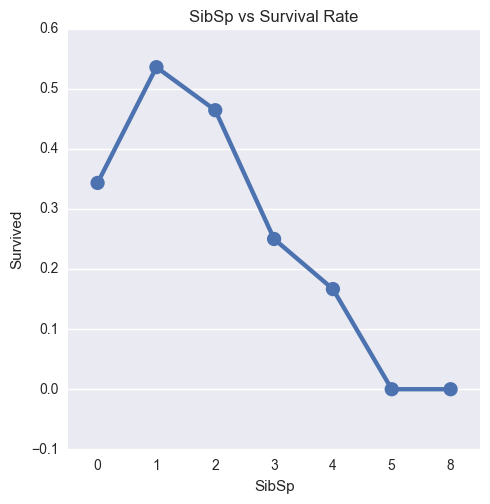

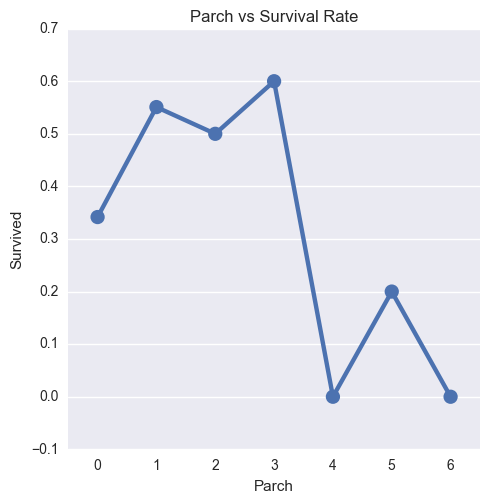

In [62]:
# Find unique values for both SibSp and Parch
unique_sibsp = np.sort(titanic_df['SibSp'].unique())
print 'Unique values for SibSp: '
print unique_sibsp
unique_parch = np.sort(titanic_df['Parch'].unique())
print 'Unique values for Parch:'
print unique_parch

# Draw graphs
relatives_sur = titanic_df[['Survived', 'SibSp', 'Parch']]
sibsp_sur = relatives_sur.groupby(['SibSp'], as_index = False).mean()
parch_sur = relatives_sur.groupby(['Parch'], as_index = False).mean()
sns.factorplot('SibSp','Survived', order = [0, 1, 2, 3, 4, 5, 8], data = sibsp_sur, size = 5)
sns.plt.title('SibSp vs Survival Rate')
ax.set(xlabel='SibSp', ylabel='Survival Rate')
sns.factorplot('Parch','Survived', order = [0, 1, 2, 3, 4, 5, 6], data = parch_sur, size = 5)
sns.plt.title('Parch vs Survival Rate')
ax.set(xlabel='Parch', ylabel='Survival Rate')

It can be concluded from previous two graphs that passengers who took less **SibSp** or **Parch** but not zero will have a bigger chance to survive. This phenomena may relate to "Women and Children First" discipline.

# Conclusion:

## Limits:

In [61]:
# Show bias of total percentage of female and survival rate
print 'Total female rate: ' + str(len(titanic_df[titanic_df['Sex'] == 'female']) * 1.0 / len(titanic_df))
print 'Total survival rate: ' + str(len(titanic_df[titanic_df['Survived'] == True]) * 1.0 / len(titanic_df))

Total female rate: 0.350956130484
Total survival rate: 0.382452193476


There are several limitations related to this dataset as follows: <br />
* There are more than 170 data with NaN age values compared with totally less than 900 data. Since age is an important predictor as described in previous section. The valid age data sample is not big enough;
* In process of data cleaning, I dropped serveral non-informative columns. I believe if more features such as is seaman or not, passengers' height, passengers' weight are all features that may play good roles with survival rate;
* There are multiple bias in this dataset. Firstly, the percentage of female is much less than 0.5; Secondly, the survived rate is too high - 0.38. It is understandable that this data mainly come from those who survived and those survived's relatives. However, this will cause a bias on those who do not survived. 

## Features vs Survival Rate

In this report, I explore **Pclass**, **Age**, **Sibsp&Parch** as potential factors which will influence survival rate. <br />
* Pclass - It is usually considered Pclass is related to passengers' social status. Will social status influence ones' survival rate in a disaster? From this data, I use graph, correlation value and chi-squared value to prove the strong relationship between pclass and survival rate. So the answer to this question should be yes.   
* Age - Age can only be considered as a group to avoid single sample problem mentioned in previous blocks. As a result, I decomposed ages into three groups - young, middle and old. Through graph, correlation value, it can be concluded that if divided into these three groups, age plays an important role in survival rate.
* Sibsp&Parch - I use two graphs to show that those passengers who had small number but not zero of relatives on board will have a higher chance of survival. This may relates to "Women and Children First" principle.

## Pclass vs Fare

Relation between **Pclass** and **Fare** - Through regression plot, correlation value and basic static information, it can be concluded that there is a direct relationship between Pclass and Fare, e.g the higher pclass, the higher fare. This meets my expectation because usually the higher the class, the higher passengers' social status and more money they may spend on food. From this side, I can also conclude that if there is a strong relationship between pclass and fare, there should also be a strong relationship between fare and survival rate.

# Future Direction

Future direction:
* Take title in name into consideration to introduce another important feature that may show passengers' social status. For example, if 'miss', then unmarried.
* Try to find relatives or even parents/children relationship between different passengers along with their survival rate according to **Sibsp** and **Parch** and previous mentioned title feature.